<div style="text-align: center;">
      « ✦ —⋆——― ꒰ঌ·✦·໒꒱ ———⋆— ✦ »
</div>

 
<div style="text-align: center;">
<h1>Projeto final de Machine Learning</h1>
<h3> TRIO EPISTASIA - Bruna Guedes, Laura Medeiros e Mariana Melo</h2>
</div>
 

<div style="text-align: center;">
      « ✦ —⋆——― ꒰ঌ·✦·໒꒱ ———⋆— ✦ »
</div>

#### Sumário
 
1) Introdução
1) Pré processamento
2) Instanciação dos modelos e investigação dos conjuntos de hiperparametros
4) Comparação dos algoritmos com validação cruzada
5) Uso de ferramenta de explicação de modelos

# 1. Introdução

## 🧑‍💻 Vamos, então, para o Código Mágico?

O Código Mágico, capaz de resolver o desafio proposto, será construído a partir da linguagem Python, em conjunto com as suas bibliotecas `scikit-learn`, `xgboost`, `pandas` e `numpy`. O primeiro passo será, então, importar essas bibliotecas para o nosso ambiente de programação.

# 2. Revisão teórica

# 3. Metodologia

# 4. Desenvolvimento

## 4.1 Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, accuracy_score, classification_report
import optuna
from functools import partial
import shap

Vamos entender o que cada uma dessas bibliotecas faz?

* `pandas`: utilizada para a manipulação e organização dos dados em estruturas do tipo DataFrame, que permitem operações semelhantes às de planilhas, facilitando a seleção de atributos, filtragem de exemplos e preparação dos dados para os modelos.

* `NumPy`: responsável por operações numéricas eficientes, base para diversos cálculos matriciais e estatísticos. Sua utilização é essencial para lidar com arrays e fornecer suporte matemático às demais bibliotecas.

* `train_test_split` (scikit-learn): método empregado para dividir o conjunto de dados em subconjuntos de treino e teste, garantindo uma avaliação justa do desempenho dos algoritmos de aprendizado de máquina.

* `StandardScaler` é usado para padronizar features ao remover a média e dimensionando para a variância. Esse processo também é conhecido como normalização z-score [1]

A segunda etapa consiste em obter os dados a serem considerados para nosso estudo. Para nos ajudar nessa missão, o Mestre C4SS4R disponibilizou um grimório mágico (também conhecido como dataset `Glioma Grading Clinical and Mutation Features`). Vamos, então, carregar os dados desse dataset a partir do código abaixo.

## 4.2 Pré-processamento 

O pré-processamento é uma etapa crítica para a previsão de dados. Ele consiste em uma série de transformações aplicadas aos dados originais que os tornem mais limpos, adequados e otimizados, garantindo que as previsões feitas a partir deles tenham a maior acurácia possível. Esse tratamento pode consistir em remover dados de baixa qualidade/irrelevantes, converter dados para melhor entendimento do algoritmo, etc.

### 4.2.1 Obtenção dos dados

O conjunto de dados de `Glioma Grading Clinical and Mutation Features` contém 839 exemplos e 23 atributos reais, categoricos ou inteiros. Neste conjunto de dados, os 20 genes mutados com mais frequência e 3 características clínicas são considerados dos projetos de glioma cerebral TCGA-LGG e TCGA-GBM. A tarefa de previsão é determinar se um paciente é LGG ou GBM com determinadas características clínicas e moleculares/mutação. O objetivo principal é encontrar o subconjunto ideal de genes de mutação e características clínicas para o processo de classificação do glioma para melhorar o desempenho e reduzir custos [2]

In [2]:
df = pd.read_csv("TCGA_InfoWithGrade.csv")

#PRÉ-PROCESSAMENTO

# Selecionar linhas onde todos os valores são não-nulos
df_non_null_all = df[df.notnull().all(axis=1)]
print("\nDataFrame apenas com linhas onde todos os valores são non-null:")
print(df_non_null_all)

#


DataFrame apenas com linhas onde todos os valores são non-null:
     Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0        0       0             51.30     0     1     0     0     0     0    0   
1        0       0             38.72     0     1     0     0     0     0    1   
2        0       0             35.17     0     1     1     1     0     0    0   
3        0       1             32.78     0     1     1     1     0     0    0   
4        0       0             31.51     0     1     1     1     0     0    0   
..     ...     ...               ...   ...   ...   ...   ...   ...   ...  ...   
834      1       1             77.89     0     0     0     0     1     0    0   
835      1       0             85.18     0     0     1     0     1     0    0   
836      1       1             77.49     0     0     1     0     1     0    0   
837      1       0             63.33     0     0     1     0     0     0    0   
838      1       0             76.61     1  

### 4.2.2 Tipos dos dados


In [3]:
df_non_null_all.dtypes

Grade                 int64
Gender                int64
Age_at_diagnosis    float64
Race                  int64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object

Apenas uma das colunas do dataset é numérica: `Age_at_diagnosis`.

### 4.2.3 Escolha do target

In [4]:
FEATURES = [col for col in df_non_null_all.columns if col != 'Grade']
TARGET = ['Grade']

X = df_non_null_all[FEATURES]
y = df_non_null_all[TARGET]

X = X.values
y = y.values.ravel()  # o método `ravel` deixa os dados em 1 dimensão

### 4.2.4 Separação de dados de treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standard
scaler_standard = StandardScaler()

X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

print ("Número de dados para treino:", len(X_train_scaled_standard))
print ("Número de dados para teste:", len(X_test_scaled_standard))

Número de dados para treino: 587
Número de dados para teste: 252


## 4.3. Modelo Baseline

In [6]:
baseline = DummyClassifier()
baseline.fit(X_train_scaled_standard, y_train)
previsaoDummy = baseline.predict(X_test_scaled_standard)

previsaoDummy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4.3 Instanciação dos modelos

Tendo nossos dados preparados com target e features delimitados, podemos prosseguir para as etapas de instanciamento, previsão e validação dos modelos preditivos. Para esse projeto, escolhemos trabalhar com os cinco modelos abaixo: 

- RandomForestClassifier 
- GradientBoostClassifier (XGBoost)
- SupportVectorClassifier (SVC)
- Bernoulli NaiveBayes (NB)
- ExtraTreesClassifier 

### 4.3.1 RandomForestClassifier

O `RandomForestClassifier` realiza previsões por meio da criação de múltiplas **árvores de decisão**. Uma árvore de decisão segue uma estrutura semelhante a de um fluxograma, onde cada ramo (chamado de *nó de decisão*) simboliza um condicional. A criação dessas árvores envolve uma subamostra e um subconjunto de tributos aleatórios. Cada árvore é, portanto, exposta a um número diferente de recursos e a uma amostra diferente do conjunto de dados original [3], o que garante que uma única árvore não se atenha demais a um único subconjunto específico de dados, o que prejudicaria na acurácia das previsões.

Quando novos dados são apresentados ao modelo (nesse caso, um novo paciente com características singulares a respeito da idade e concentração de proteínas), ele é processado por todas as árvores de decisão individualmente. Cada árvore decide qual será o rótulo (LGG ou GBM), e ao final, o algoritmo considera a categoria com maior número de votos.  

Esse modelo toma como hiperparâmetros:

In [7]:
random_forest = RandomForestClassifier() 

random_forest.fit(X_train_scaled_standard, y_train)

previsao_RF = random_forest.predict(X_test_scaled_standard)

previsao_RF

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [8]:
# Classification Report
print(classification_report(previsao_RF, y_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       141
           1       0.87      0.80      0.84       111

    accuracy                           0.86       252
   macro avg       0.86      0.85      0.86       252
weighted avg       0.86      0.86      0.86       252



### 4.3.2 XGBoostClassifier

O **Gradient Boosting** é uma forma de algoritmo que se beneficia do uso de uma equipe de outros modelos simples (geramente árvores de decisão) para prever dados. Em suas previsões, ele primeiro realiza um chute inicial simples (tirando a média ou moda, por exemplo), para então calcular os erros. Ele então treina modelos simples para tentar prever e compreender os erros que esse modelo inicial realizou, somando essa correção ao chute inicial e realizando uma nova previsão. Esse processo é repetido várias vezes, até que os erros sejam minimizados ao máximo. Isso lhe da um controle excelente sobre problemas de *overfitting*.

O `XGBoost` (Extreme Gradient Boosting) é uma versão otimizada desse algoritmo, implementando melhorias que o tornam mais preciso, como a regularização L1 e L2, que adiciona uma penalidade para modelos que se demonstram muito apegados a um conjunto específico dos dados e poderia gerar previsões "viciadas". Usamos o `XGBoostClassifier` para problemas de classificação, como é o nosso caso.

In [9]:
xgboost = XGBClassifier()

xgboost.fit(X_train_scaled_standard, y_train)

previsao_XGB = xgboost.predict(X_test_scaled_standard)

previsao_XGB

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [10]:
# Classification Report
print(classification_report(previsao_XGB, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       147
           1       0.80      0.78      0.79       105

    accuracy                           0.83       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.83      0.83       252



### 4.3.3 SupportVectorClassification (SVC)



O algoritmo `SupportVectorClassification` é uma modalidade do `SupportVectorMachine` (SVM). Ele busca manter rótulos diferentes o mais distantes possíveis - ou seja, ele tenta separar e maximizar a margem entre os dados da melhor maneira possível, tornando-os distínguiveis o suficiente para uma previsão com boa acurácia. Os pontos mais próximos entre a margem que divide os dados são chamados de **vetores de suporte**, o que justifica o nome do algoritmo. O SVC obtêm um espaço onde a divisão é pode ser realizada por meio de um plano, utilizando a ténica **Kernel**: ele transforma os dados para um espaço de maior dimensão (3D ou mais), assim conseguindo separar os dados linearmente. O SVC então calcula o **produto escalar** para definir o Hiperplano de Separação (fronteira de decisão). 

Sendo um classificador discriminativo, ele é ideal para problemas de classificação binária, e portanto podemos aplicá-lo para o nosso caso:

In [11]:
modelo_svc = SVC()

modelo_svc.fit(X_train_scaled_standard, y_train)

previsao_SVC = modelo_svc.predict(X_test_scaled_standard)

previsao_SVC

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [12]:
# Classification Report
print(classification_report(previsao_SVC, y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       134
           1       0.90      0.78      0.84       118

    accuracy                           0.86       252
   macro avg       0.86      0.85      0.85       252
weighted avg       0.86      0.86      0.86       252



### 4.3.4 Bernoulli NaiveBayes (NB)

O classificador Naive Bayes (NB) é um algoritmo de aprendizado de máquina que se baseia no **Teorema de Bayes** para realizar classificações. Ele calcula a **probabilidade a posteriori** de cada classe, dadas as características de um novo dado. O algoritmo então atribui o dado à classe com a maior probabilidade. O Teorema de Bayes é dado pela equação:

$$
P(A | B) = \frac{P(A) P(B | A).}{P(B)}.
$$
*(Onde $P(A)$ é a probabilidade inicial; $P(B|A)$ é a verossimilhança (probabilidade de $A$ dado que $B$ ocorreu); $P(B)$ é a probabilidade individual (também chamada de evidência); e $P(A|B)$ é a probabilidade a posteriori)*

O termo "Naive" (Ingênuo) vem da principal simplificação que o algoritmo faz: ele assume que todas as características (features) são condicionalmente independentes umas das outras. Essa suposição, entre tanto, o torna um algoritmo muito funcional para previsões.

O `Bernoulli NaiveBayes` é uma variante desse classificador que analisa a presença ou ausência de uma *feature* - sendo melhor aplicado quando os dados estão em sua forma binária (0 ou 1). Em nosso dataset, ele calcula a probabilidade de cada classe dado a presença ou ausência das mutações. 

In [13]:
BNB = BernoulliNB()

BNB.fit(X_train_scaled_standard, y_train)

previsao_BNB = BNB.predict(X_test_scaled_standard)

previsao_BNB

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [14]:
# Classification Report
print(classification_report(previsao_BNB, y_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       134
           1       0.92      0.80      0.85       118

    accuracy                           0.87       252
   macro avg       0.88      0.87      0.87       252
weighted avg       0.88      0.87      0.87       252



### 4.3.5 ExtraTreesClassifier 

O `ExtraTreesClassifier` (Extremely Randomized Trees) segue a mesma premissa do `RandomForestClassifier`, como discutido anteriormente, porém, possui caracteristicas que ajudam a minimizar ainda mais o overfitting e ajudar na generalização. A principal delas é que ele introduz mais aleatoriedade, tornando as árvores mais diversas ao também randomizar o split de dados (diferente do RFC, que escolhe o melhor ponto de corte usando métricas como Entropia). Devido a esse fato, ele também pode executar de forma bem mais rápida comparado ao RFC tradicional. 

In [15]:
ETC = ExtraTreesClassifier()

ETC.fit(X_train_scaled_standard, y_train)

previsao_ETC = ETC.predict(X_test_scaled_standard)

previsao_ETC

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [16]:
# Classification Report
print(classification_report(previsao_ETC, y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       142
           1       0.81      0.75      0.78       110

    accuracy                           0.82       252
   macro avg       0.82      0.81      0.81       252
weighted avg       0.82      0.82      0.82       252



## 4.4. Investigação dos conjuntos de hiperparâmetros para cada algoritmo usando optuna

In [17]:
def objective(trial, model_class):
    params = {}
    
    # Escolher hiperparâmetros com base no modelo
    if model_class.__name__ in ["RandomForestClassifier", "ExtraTreesClassifier"]:
        params['n_estimators'] = trial.suggest_int('n_estimators', 50, 500)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 20)
        params['min_samples_split'] = trial.suggest_int('min_samples_split', 2, 20)
        params['min_samples_leaf'] = trial.suggest_int('min_samples_leaf', 1, 10)
        params['random_state'] = 42
        params['n_jobs'] = -1

    elif model_class.__name__ == "SVC":
        params['C'] = trial.suggest_float('C', 0.1, 10.0, log=True)
        params['kernel'] = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
        params['gamma'] = trial.suggest_categorical('gamma', ['scale', 'auto'])
        params['random_state'] = 42

    elif model_class.__name__ == "BernoulliNB":
        params['alpha'] = trial.suggest_float('alpha', 0.0, 1.0)
    
    elif model_class.__name__ == "XGBClassifier":
        params['n_estimators'] = trial.suggest_int('n_estimators', 50, 500)
        params['max_depth'] = trial.suggest_int('max_depth', 2, 20)
        params['learning_rate'] = trial.suggest_float('learning_rate', 0.01, 0.3)
        params['subsample'] = trial.suggest_float('subsample', 0.5, 1.0)
        params['random_state'] = 42
        params['n_jobs'] = -1

    # Instanciar modelo com os parâmetros
    model = model_class(**params)

    # Treinar e avaliar
    model.fit(X_train_scaled_standard, y_train)
    y_pred = model.predict(X_test_scaled_standard)
    return accuracy_score(y_test, y_pred)

### 4.4.1. RandomForestClassifier

In [18]:
# Exemplo: otimizar RandomForest
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=RandomForestClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-10-31 10:18:52,372] A new study created in memory with name: no-name-c3df525e-afc7-4f59-a983-cc21b43e3e31
[I 2025-10-31 10:18:54,257] Trial 0 finished with value: 0.873015873015873 and parameters: {'n_estimators': 456, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:18:54,654] Trial 1 finished with value: 0.876984126984127 and parameters: {'n_estimators': 71, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.876984126984127.
[I 2025-10-31 10:18:55,953] Trial 2 finished with value: 0.8690476190476191 and parameters: {'n_estimators': 306, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.876984126984127.
[I 2025-10-31 10:18:56,344] Trial 3 finished with value: 0.876984126984127 and parameters: {'n_estimators': 78, 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.87


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 231, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 2}


### 4.4.2. XGBClassifier

In [19]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=XGBClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-10-31 10:20:34,180] A new study created in memory with name: no-name-46042240-f4c1-43e6-8dcd-2a3ea10714f8
[I 2025-10-31 10:20:34,560] Trial 0 finished with value: 0.8452380952380952 and parameters: {'n_estimators': 126, 'max_depth': 13, 'learning_rate': 0.1366226628440855, 'subsample': 0.713621416366083}. Best is trial 0 with value: 0.8452380952380952.
[I 2025-10-31 10:20:35,155] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 233, 'max_depth': 11, 'learning_rate': 0.23704012732814533, 'subsample': 0.9339883682532637}. Best is trial 0 with value: 0.8452380952380952.
[I 2025-10-31 10:20:35,446] Trial 2 finished with value: 0.8492063492063492 and parameters: {'n_estimators': 103, 'max_depth': 17, 'learning_rate': 0.15166246370438555, 'subsample': 0.5958010958723627}. Best is trial 2 with value: 0.8492063492063492.
[I 2025-10-31 10:20:36,200] Trial 3 finished with value: 0.8412698412698413 and parameters: {'n_estimators': 368, 'max_depth': 8, 'lear


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 247, 'max_depth': 9, 'learning_rate': 0.011519966868068174, 'subsample': 0.593291664397253}


### 4.4.3. SupportVectorClassification

In [20]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=SVC), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-10-31 10:21:42,622] A new study created in memory with name: no-name-6e4b32cb-02f4-425d-9379-00873ec857fb
[I 2025-10-31 10:21:42,658] Trial 0 finished with value: 0.7936507936507936 and parameters: {'C': 0.4381515365677754, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 0.7936507936507936.
[I 2025-10-31 10:21:42,697] Trial 1 finished with value: 0.873015873015873 and parameters: {'C': 2.413668225093877, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 1 with value: 0.873015873015873.
[I 2025-10-31 10:21:42,727] Trial 2 finished with value: 0.7738095238095238 and parameters: {'C': 0.2511065454353743, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 1 with value: 0.873015873015873.
[I 2025-10-31 10:21:42,773] Trial 3 finished with value: 0.8650793650793651 and parameters: {'C': 0.5697874249221833, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.873015873015873.
[I 2025-10-31 10:21:42,822] Trial 4 finished with value: 0.8650793650793651 and p


Melhores parâmetros encontrados pelo Optuna:
{'C': 2.413668225093877, 'kernel': 'linear', 'gamma': 'scale'}


### 4.4.4. Bernoulli Naive Bayes

In [21]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=BernoulliNB), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-10-31 10:21:48,956] A new study created in memory with name: no-name-1cf4e60d-0b73-4028-a083-d07aa3223ece
[I 2025-10-31 10:21:48,968] Trial 0 finished with value: 0.873015873015873 and parameters: {'alpha': 0.5082514722993393}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:21:48,968] Trial 1 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.08035532789273314}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:21:48,985] Trial 2 finished with value: 0.873015873015873 and parameters: {'alpha': 0.6185920696109236}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:21:49,000] Trial 3 finished with value: 0.873015873015873 and parameters: {'alpha': 0.8036370438420879}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:21:49,000] Trial 4 finished with value: 0.8690476190476191 and parameters: {'alpha': 0.4478118697036879}. Best is trial 0 with value: 0.873015873015873.
[I 2025-10-31 10:21:49,014] Trial 5 fi


Melhores parâmetros encontrados pelo Optuna:
{'alpha': 0.5082514722993393}


### 4.4.5. ExtraTreesClassifier

In [22]:
study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, model_class=ExtraTreesClassifier), n_trials=100)
print("\nMelhores parâmetros encontrados pelo Optuna:")
print(study.best_params)

[I 2025-10-31 10:21:50,758] A new study created in memory with name: no-name-3b8ec522-2cc9-47e5-850d-88f395785c39
[I 2025-10-31 10:21:51,239] Trial 0 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 132, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-10-31 10:21:51,893] Trial 1 finished with value: 0.876984126984127 and parameters: {'n_estimators': 201, 'max_depth': 13, 'min_samples_split': 18, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-10-31 10:21:52,507] Trial 2 finished with value: 0.876984126984127 and parameters: {'n_estimators': 171, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8809523809523809.
[I 2025-10-31 10:21:52,717] Trial 3 finished with value: 0.8809523809523809 and parameters: {'n_estimators': 56, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with valu


Melhores parâmetros encontrados pelo Optuna:
{'n_estimators': 241, 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 1}


## 4.5. Comparação dos algoritmos usando validação cruzada

In [23]:
# Lista de modelos
modelos = {
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(random_state=42, n_jobs=-1),
    "SVC": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "BernoulliNB": BernoulliNB(),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1)
}

# Avaliação com validação cruzada
resultados = {}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled_standard, y_train,
                              cv=5, scoring=make_scorer(accuracy_score))
    resultados[nome] = {
        "média": np.mean(scores),
        "desvio": np.std(scores)
    }

# Exibir resultados
for nome, res in resultados.items():
    print(f"{nome}: Acurácia média = {res['média']:.4f} | Desvio = {res['desvio']:.4f}")

RandomForest: Acurácia média = 0.8416 | Desvio = 0.0116
ExtraTrees: Acurácia média = 0.8211 | Desvio = 0.0076
SVC: Acurácia média = 0.8620 | Desvio = 0.0168
BernoulliNB: Acurácia média = 0.8620 | Desvio = 0.0065
XGBoost: Acurácia média = 0.8296 | Desvio = 0.0233


## 4.6. Uso de ferramentas explicativas

In [24]:
!pip install shap


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


### 4.6.1. RandomForestClassifier

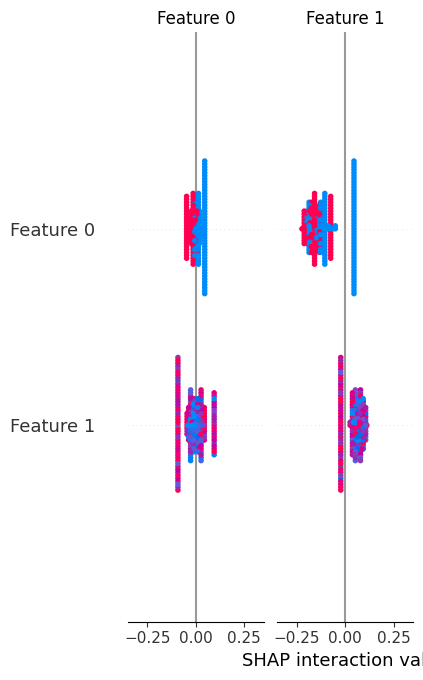

In [25]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.6.2. XGBoostClassifier

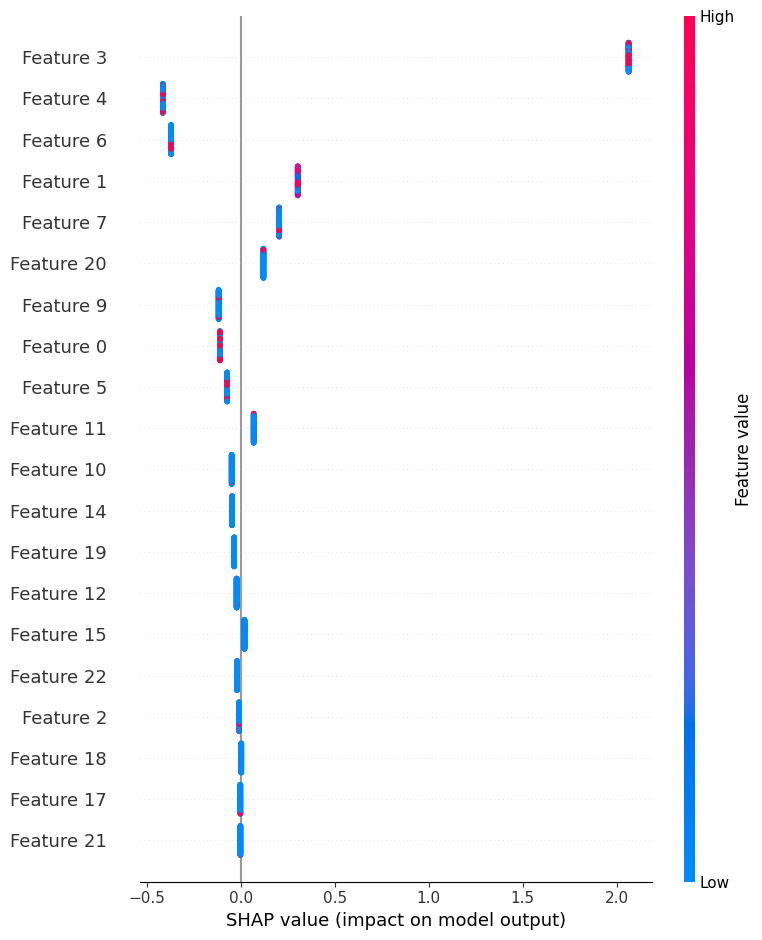

In [26]:
explainer = shap.Explainer(xgboost)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### 4.6.3. SupportVectorClassification

PermutationExplainer explainer: 253it [04:48,  1.14s/it]                                                               
C:\Users\mariana25021\AppData\Local\Temp\ipykernel_26192\925064493.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


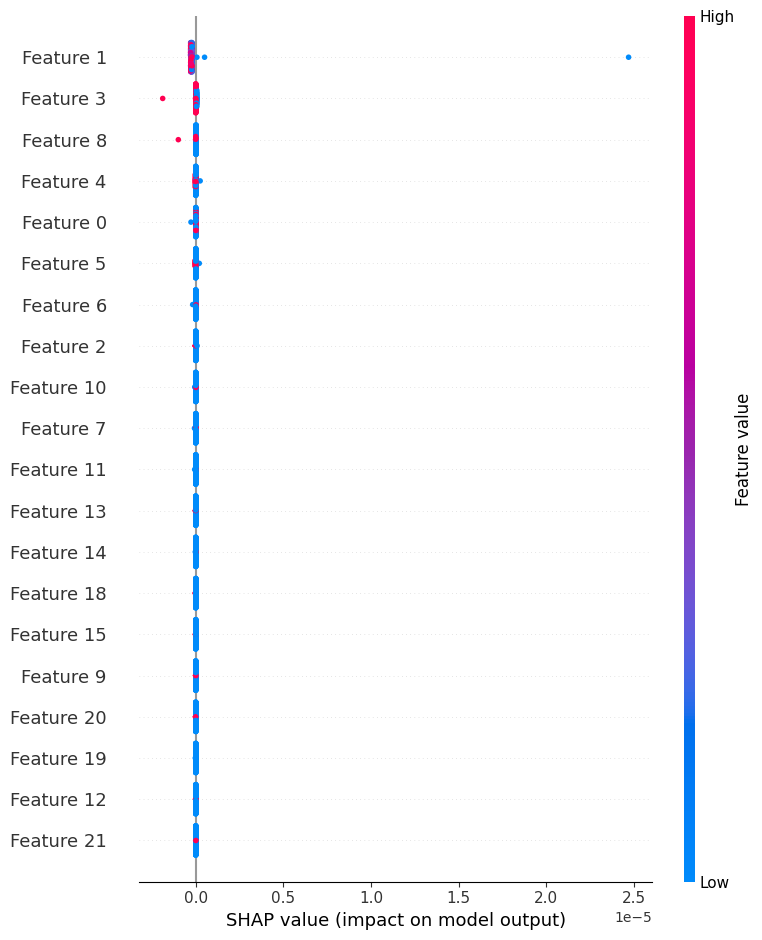

In [27]:
masker = shap.maskers.Independent(X_test)

explainer = shap.Explainer(modelo_svc.decision_function, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

### 4.6.4. Bernoulli Naivebayes

PermutationExplainer explainer: 253it [00:13,  6.69it/s]                                                               
C:\Users\mariana25021\AppData\Local\Temp\ipykernel_26192\1811291634.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this fu

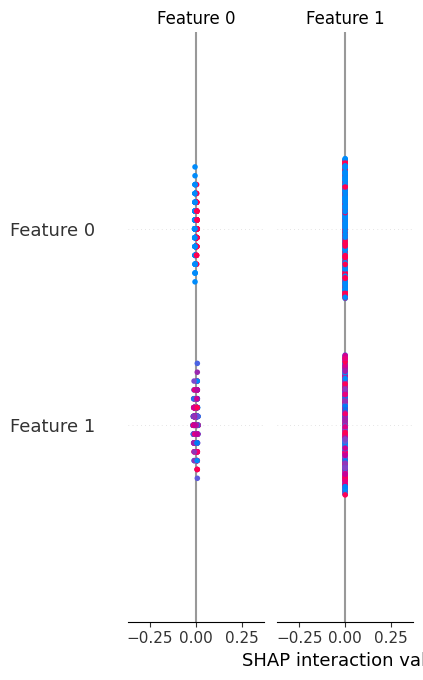

In [28]:
# Crie um masker (os dados de entrada)
masker = shap.maskers.Independent(X_test)

# Explainer com função explícita
explainer = shap.Explainer(BNB.predict_proba, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

### 4.6.5. ExtraTreesClassifier

C:\Users\mariana25021\AppData\Local\Temp\ipykernel_26192\1135830705.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\mariana25021\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

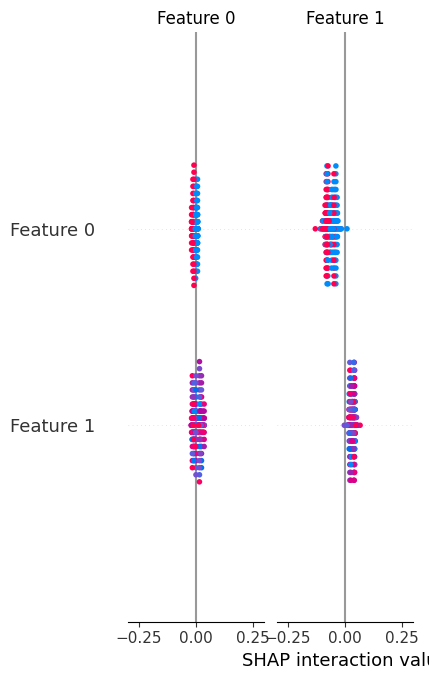

In [29]:
explainer = shap.Explainer(ETC)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Resultados e Discussões

# Conclusões

# Referências Bibliográficas

[1] SCIKIT-LEARN. StandardScaler. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>.

[2] UCI Machine Learning Repository. Disponível em: <https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset>.

[3] SHAFI, A. Classificação de floresta aleatória com o Scikit-Learn. Disponível em: <https://www.datacamp.com/pt/tutorial/random-forests-classifier-python>. Acesso em: 30 out. 2025

[4] BEX TUYCHIEV. Um guia para o algoritmo Gradient Boosting. Disponível em: <https://www.datacamp.com/pt/tutorial/guide-to-the-gradient-boosting-algorithm>. Acesso em: 30 out. 2025.

[5] AWAN, A. A. Uma introdução aos valores SHAP e à interpretabilidade do aprendizado de máquina. Disponível em: <https://www.datacamp.com/pt/tutorial/introduction-to-shap-values-machine-learning-interpretability>. Acesso em: 31 out. 2025.

# Uso de Inteligência Artificial